# Modeling and Simulation 8 - Quadratic Programming

## The Sequential Quadratic Programming (SQP) Algorithm

Quadratic programming (QP) is a type of mathematical optimization problem where the objective function and constraints are quadratic. It involves minimizing or maximizing a quadratic objective function subject to linear equality or inequality constraints.

The general form of a quadratic programming problem can be expressed as:

Minimize or maximize:
0.5 * x^T * P * x + q^T * x

Subject to:
G * x <= h
A * x = b

Here, x is the vector of decision variables, P is a symmetric positive definite matrix representing the quadratic term, q is the vector representing the linear term, G and h are the matrices and vectors defining the inequality constraints, and A and b are the matrices and vectors defining the equality constraints.

Quadratic programming problems can be classified into two main categories based on the properties of the matrices P and G:

- Convex QP: In a convex QP, the matrix P is positive semidefinite, which means that the objective function is convex. Convex QP problems have a single global minimum or maximum solution, and efficient algorithms exist to solve them, such as the interior-point method or active-set methods.

- Non-convex QP: Non-convex QP problems have a matrix P that is not positive semidefinite, resulting in a non-convex objective function. Non-convex QPs can have multiple local minima or maxima, and finding the global solution becomes more challenging. Various algorithms, including heuristic approaches, global optimization techniques, or branch-and-bound methods, are used to solve non-convex QP problems.

Quadratic programming finds applications in various fields, including finance, engineering, economics, operations research, and machine learning. Some common applications of quadratic programming include:

* Portfolio optimization in finance, where investors aim to find the optimal allocation of assets to maximize returns while considering risk factors.
* Support vector machines (SVMs) in machine learning, where quadratic programming is used to find the hyperplane that separates classes with the maximum margin.
* Process optimization in engineering, where quadratic programming is used to optimize process parameters while satisfying constraints.
* Resource allocation and scheduling problems, where quadratic programming is used to allocate resources optimally while considering various constraints.

Solving quadratic programming problems often requires specialized optimization solvers or libraries that can handle the specific problem structure efficiently. Many numerical computing environments, such as MATLAB, Python with libraries like SciPy or CVXPY, and optimization solvers like Gurobi or CPLEX, provide tools for solving quadratic programming problems.

Here's the corrected formatting of the block of text:

Consider a nonlinear programming problem of the form:

\begin{align*}
\min_{x} \quad & f(x) \\
\text{subject to} \quad & h(x) \geq 0 \\
& g(x) = 0.
\end{align*}

The Lagrangian for this problem is:

\mathcal{L}(x, \lambda, \sigma) = f(x) - \lambda h(x) - \sigma g(x),

where $\lambda$ and $\sigma$ are Lagrange multipliers.

The standard Newton's Method searches for the solution by iterating the following equation:

\begin{bmatrix}x_{k+1}\\\lambda_{k+1}\\\sigma_{k+1}\end{bmatrix} = \begin{bmatrix}x_{k}\\\lambda_{k}\\\sigma_{k}\end{bmatrix} - \underbrace{\begin{bmatrix}\nabla_{xx}^{2}\mathcal{L} & \nabla h & \nabla g \\ \nabla h^{T} & 0 & 0 \\ \nabla g^{T} & 0 & 0\end{bmatrix}^{-1}}_{\nabla^{2}\mathcal{L}} \underbrace{\begin{bmatrix}\nabla f + \lambda_{k}\nabla h + \sigma_{k}\nabla g \\ h \\ g\end{bmatrix}}_{\nabla\mathcal{L}}.

However, because the matrix $\nabla^{2}\mathcal{L}$ is generally singular (and therefore non-invertible), the Newton step $d_{k} = (\nabla^{2}\mathcal{L})^{-1}\nabla\mathcal{L}$ cannot be calculated directly.

Instead, the basic sequential quadratic programming algorithm defines an appropriate search direction $d_{k}$ at an iterate $(x_{k}, \lambda_{k}, \sigma_{k})$, as a solution to the quadratic programming subproblem:

\begin{align*}
\min_{d} \quad & f(x_{k}) + \nabla f(x_{k})^{T}d + \frac{1}{2}d^{T}\nabla_{xx}^{2}\mathcal{L}(x_{k}, \lambda_{k}, \sigma_{k})d \\
\text{s.t.} \quad & h(x_{k}) + \nabla h(x_{k})^{T}d \geq 0 \\
& g(x_{k}) + \nabla g(x_{k})^{T}d = 0.
\end{align*}

Note that the term $f(x_{k})$ in the expression above may be left out for the minimization problem since it is constant under the $\min_{d}$ operator.

Together, the SQP algorithm starts by first choosing the initial iterate $(x_{0}, \lambda_{0}, \sigma_{0})$, then calculating $\nabla^{2}\mathcal{L}(x_{0}, \lambda_{0}, \sigma_{0})$ and $\nabla\mathcal{L}(x_{0}, \lambda_{0}, \sigma_{0})$. Then the QP subproblem is built and solved to find the Newton step direction $d_{0}$, which is used to update the parent problem iterate using:

\begin{bmatrix}
\begin{align*}
x_{k+1} \\
\lambda_{k+1} \\
\sigma_{k+1}
\end{align*}
\end{bmatrix}
=
\begin{bmatrix}
x_k \\
\lambda_k \\
\sigma_k
\end{bmatrix}
+ d_k.

The SQP algorithm iteratively performs these steps until convergence is achieved. Each iteration involves solving the QP subproblem to obtain the search direction $d_k$, updating the iterate variables, and recalculating the necessary derivatives for the next iteration.

By iteratively updating the iterate variables based on the search direction, the SQP algorithm aims to find a solution that satisfies the KKT conditions for the given nonlinear programming problem. It combines aspects of Newton's method with quadratic programming to handle both equality and inequality constraints in the optimization problem.

Note that the specific implementation of the SQP algorithm may vary, and additional techniques such as line search or merit function approaches may be incorporated for better convergence and efficiency.

These is a rough outline of the SQP algorithm that we are going to study today:

1. Initialize Variables:

- Set the maximum number of iterations (MAX_ITER) and the tolerance for convergence (TOLERANCE).
- Initialize the solution, lagrange_multipliers, and old_constraint_values with the given initial values.

2. Iteration Loop:

- Iterate for a maximum of MAX_ITER times.
- For each iteration:
    - Construct and solve the quadratic subproblem:
            Compute the gradient of the objective function (objective_gradient) and the gradients of the constraint functions (constraint_gradients) at the current solution.
            Compute the Hessian of the objective function (objective_hessian) and the Hessians of the constraint functions (constraint_hessians) at the current solution.
            Build the augmented Lagrangian Hessian by summing the objective Hessian with the weighted constraint Hessians (weighted by the lagrange_multipliers).
            Build the augmented Lagrangian gradient by summing the objective gradient with the weighted constraint gradients (weighted by the lagrange_multipliers).
            Solve the quadratic subproblem by solving the equation: augmented_lagrangian_hessian * search_direction = -augmented_lagrangian_gradient, where search_direction is the search direction for the next iterate.
    - Update the solution:
            Perform a line search to determine the step length (step_length) by iteratively halving it until all constraint functions are satisfied at the new solution (new_solution = solution + step_length * search_direction).
            Update the solution by assigning it the new_solution.
    - Update the Lagrange multipliers:
            Compute the constraint values (constraint_values) by evaluating the constraint functions at the updated solution.
            Update the Lagrange multipliers by adding the constraint values to the lagrange_multipliers.
    - Convergence Check:
            Compute the maximum violation of the constraints (max_constraint_violation) by taking the maximum absolute difference between the current constraint values and the previous constraint values (old_constraint_values).
            Update the old_constraint_values with the current constraint values for the next iteration.
            If the maximum constraint violation is below the tolerance (max_constraint_violation < TOLERANCE), terminate the iterations and return the solution.
    - If the maximum number of iterations is reached without convergence, print a message indicating the lack of convergence.

Formally, this would mean:

\begin{align*}
& \text{Compute the gradient of the objective function: } \nabla f(\mathbf{x}) \\
& \text{Compute the gradients of the constraint functions: } \nabla h_i(\mathbf{x}) \text{ for all constraints } i \\
& \text{Compute the Hessian of the objective function: } \nabla^2 f(\mathbf{x}) \\
& \text{Compute the Hessians of the constraint functions: } \nabla^2 h_i(\mathbf{x}) \text{ for all constraints } i \\
& \text{Build the augmented Lagrangian Hessian:} \\
& \quad \mathbf{H} = \nabla^2 f(\mathbf{x}) + \sum_{i} \lambda_i \nabla^2 h_i(\mathbf{x}) \\
& \text{Build the augmented Lagrangian gradient:} \\
& \quad \mathbf{g} = \nabla f(\mathbf{x}) + \sum_{i} \lambda_i \nabla h_i(\mathbf{x}) \\
& \text{Solve the quadratic subproblem:} \\
& \quad \mathbf{s} = \text{solve}(\mathbf{H}, -\mathbf{g})
\end{align*}

\begin{align*}
& \text{Set the step length: } \text{step\_length} = 1.0 \\
& \text{while } \text{step\_length} > 1e-20: \\
& \quad \text{Update the solution:} \\
& \quad \quad \mathbf{x}_{\text{new}} = \mathbf{x} + \text{step\_length} \times \mathbf{s} \\
& \quad \text{Check if all constraint functions are satisfied at the new solution:} \\
& \quad \quad \text{if } h_i \quad \quad \quad \quad (\mathbf{x}_{\text{new}}) \leq 0 \quad \forall i \\
& \quad \quad \quad \quad \text{break} \\
& \quad \quad \text{Reduce the step length: } \text{step\_length} = \text{step\_length} \times 0.5 \\
& \text{Update the solution:} \\
& \quad \mathbf{x} = \mathbf{x}_{\text{new}}
\end{align*}

\begin{align*}
& \text{Compute the constraint values at the updated solution:} \\
& \quad \mathbf{c} = [h_1(\mathbf{x}), h_2(\mathbf{x}), \ldots] \\
& \text{Update the Lagrange multipliers:} \\
& \quad \boldsymbol{\lambda} = \boldsymbol{\lambda} + \mathbf{c}
\end{align*}

\begin{align*}
& \text{Compute the maximum constraint violation:} \\
& \quad \text{max\_constraint\_violation} = \max(|\mathbf{c} - \mathbf{c}_{\text{old}}|) \\
& \text{Update the old constraint values:} \\
& \quad \mathbf{c}_{\text{old}} = \mathbf{c} \\
& \text{if } \text{max\_constraint\_violation} < \text{TOLERANCE}: \\
& \quad \text{Print the number of iterations taken for convergence} \\
& \quad \text{break}
\end{align*}

In [3]:
import numpy as np
# You can define your own objective function, constraints, gradients, and Hessians
def objective_func(x):
    return x[0]**2 + x[1]**2

def constraint_func_1(x):
    return x[0] + x[1] - 1

def constraint_func_2(x):
    return x[0]**2 + x[1]**2 - 2

def gradient_obj(x):
    return np.array([2 * x[0], 2 * x[1]], dtype=float)

def gradient_constraint_1(x):
    return np.array([1, 1], dtype=float)

def gradient_constraint_2(x):
    return np.array([2 * x[0], 2 * x[1]], dtype=float)

def hessian_obj(x):
    return np.array([[2, 0], [0, 2]], dtype=float)

def hessian_constraint_1(x):
    return np.zeros((2, 2), dtype=float)

def hessian_constraint_2(x):
    return np.array([[2, 0], [0, 2]], dtype=float)

# Set initial solution and Lagrange multipliers. Make sure the initial solution fits within the constraints
initial_solution = np.array([0, 0], dtype=float)
initial_lagrange_multipliers = np.array([0, 0], dtype=float)

/home/mihai/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


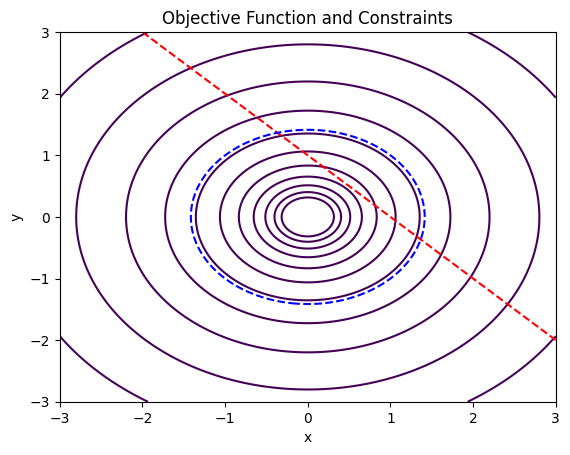

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Generate grid points for plotting
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# TODO: Apply the objective function on your grid
Z = X**2 + Y**2  # Objective function

# TODO: Plot the contour of the objective function
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')

# TODO: Plot the constraints
C1 = X + Y - 1  # Constraint 1: x + y - 1 = 0
C2 = X**2 + Y**2 - 2  # Constraint 2: x^2 + y^2 - 2 = 0
plt.contour(X, Y, C1, levels=[0], colors='red', linestyles='dashed')
plt.contour(X, Y, C2, levels=[0], colors='blue', linestyles='dashed')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Objective Function and Constraints')

# Set plot limits
plt.xlim([-3, 3])
plt.ylim([-3, 3])

# Show the plot
plt.show()

In [5]:
import numpy as np
from scipy.linalg import cholesky, solve

def sqp_algorithm(initial_solution, initial_lagrange_multipliers, objective_func, constraint_funcs, gradient_obj, gradient_constraints, hessian_obj, hessian_constraints):
    MAX_ITER = 100  # Maximum number of iterations
    TOLERANCE = 1e-6  # Tolerance for convergence

    solution = initial_solution  # Initialize the solution
    lagrange_multipliers = initial_lagrange_multipliers  # Initialize the Lagrange multipliers
    old_constraint_values = np.zeros(len(constraint_funcs))  # Initialize the old constraint values

    for iteration in range(MAX_ITER):
        # Step 1: Construct and solve the quadratic subproblem
        # Compute the gradients of the objective function and the constraint functions
        objective_gradient = gradient_obj(solution)
        constraint_gradients = [gradient_func(solution) for gradient_func in gradient_constraints]

        # Compute the Hessians of the objective function and the constraint functions
        objective_hessian = hessian_obj(solution)
        constraint_hessians = [hessian_func(solution) for hessian_func in hessian_constraints]

        # Build the augmented Lagrangian Hessian and Lagrangian gradient
        augmented_lagrangian_hessian = objective_hessian
        for i in range(len(lagrange_multipliers)):
            augmented_lagrangian_hessian += lagrange_multipliers[i] * constraint_hessians[i]
        
        augmented_lagrangian_gradient = objective_gradient
        for i in range(len(lagrange_multipliers)):
            augmented_lagrangian_gradient += lagrange_multipliers[i] * constraint_gradients[i]

        # Solve the quadratic subproblem to obtain the new direction
        try:
            cholesky_factor = cholesky(augmented_lagrangian_hessian, lower=True)
            search_direction = solve(cholesky_factor, -augmented_lagrangian_gradient, lower=True)
            search_direction = solve(cholesky_factor.T, search_direction, lower=False)
        except np.linalg.LinAlgError:
            print("Hessian is not positive definite. SQP algorithm stopped.")
            break

        # Step 2: Update the solution
        step_length = 1.0  # The optimistic value
        while step_length > 1e-20:  # Perform line search to determine the step length
            new_solution = solution + step_length * search_direction
            if all(constraint_func(new_solution) >= 0 for constraint_func in constraint_funcs):
                break  # Valid step
            step_length *= 0.5  # Reduce the step length
        
        solution = new_solution  # Update the solution

        # Step 3: Update the Lagrange multipliers
        constraint_values = np.array([constraint_func(solution) for constraint_func in constraint_funcs])
        lagrange_multipliers = np.maximum(0, lagrange_multipliers + constraint_values)

        # Convergence check
        if np.linalg.norm(constraint_values - old_constraint_values) < TOLERANCE:
            break
        old_constraint_values = constraint_values

    return solution

# Define constraints and their gradients
constraint_funcs = [constraint_func_1, constraint_func_2]
gradient_constraints = [gradient_constraint_1, gradient_constraint_2]
hessian_constraints = [hessian_constraint_1, hessian_constraint_2]

# Set initial solution and Lagrange multipliers
initial_solution = np.array([0.5, 0.5], dtype=float)
initial_lagrange_multipliers = np.array([0.5, 0.5], dtype=float)

# Run the SQP algorithm
optimal_solution = sqp_algorithm(initial_solution, initial_lagrange_multipliers, objective_func, constraint_funcs, gradient_obj, gradient_constraints, hessian_obj, hessian_constraints)
print("Optimal solution:", optimal_solution)

print("Objective value:", objective_func(optimal_solution))


Optimal solution: [0.5 0.5]
Objective value: 0.5


In [6]:
result = sqp_algorithm(initial_solution, initial_lagrange_multipliers, objective_func, [constraint_func_1, constraint_func_2],
                       gradient_obj, [gradient_constraint_1, gradient_constraint_2], hessian_obj, [hessian_constraint_1, hessian_constraint_2])

print("Optimal solution:")
print(result)
print("Objective value:")
print(objective_func(result))

Optimal solution:
[0.5 0.5]
Objective value:
0.5
